In [12]:
import numpy as np
import mne
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
path_ses_1 = "sub-0221/ses-01/meg/sub-0221_ses-01_task-rest_proc-autoreject_epo.fif"
path_ses_2 = "sub-0221/ses-02/meg/sub-0221_ses-02_task-rest_proc-autoreject_epo.fif"
epochs_ses_1 = mne.read_epochs(path_ses_1)
epochs_ses_2 = mne.read_epochs(path_ses_2)

Reading /home/florent/omega_epochs_bids/sub-0221/ses-01/meg/sub-0221_ses-01_task-rest_proc-autoreject_epo.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =       0.00 ...   10000.00 ms
        5 CTF compensation matrices available
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Reading /home/florent/omega_epochs_bids/sub-0221/ses-02/meg/sub-0221_ses-02_task-rest_proc-autoreject_epo.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =       0.00 ...   10000.00 ms
        5 CTF compensation matrices available
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated


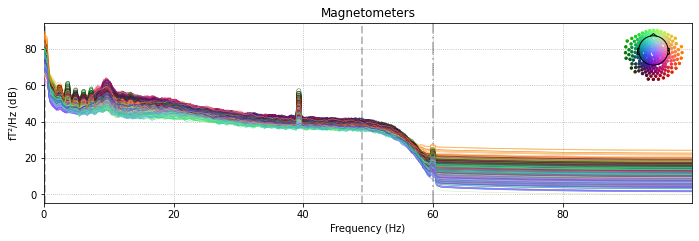

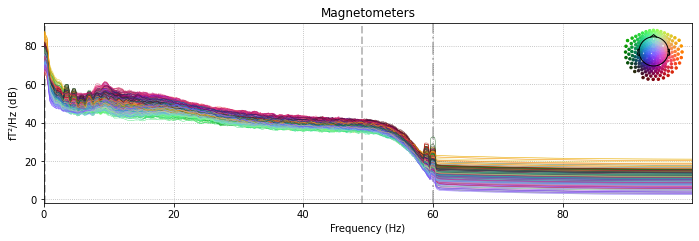

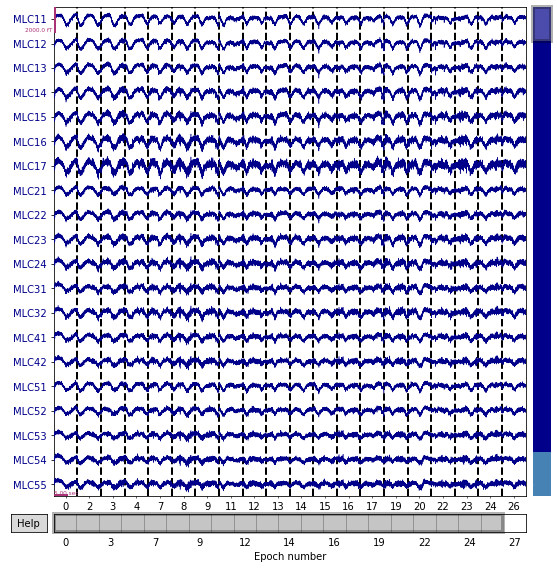

In [14]:
fig = epochs_ses_1.plot()

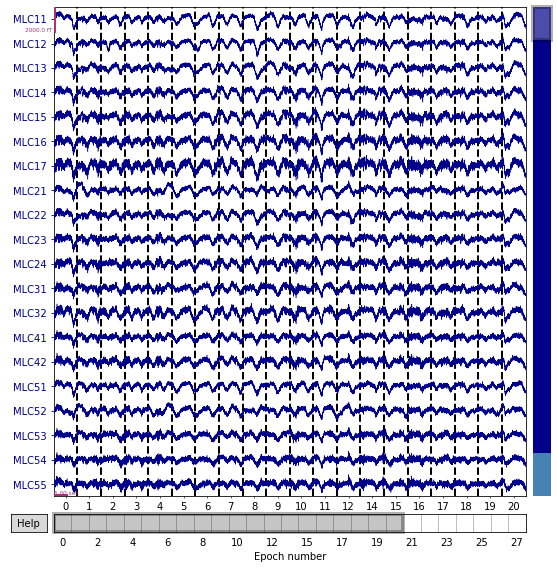

In [15]:
fig = epochs_ses_2.plot()

In [16]:
fig = epochs_ses_1.compute_psd().plot()

Removing 5 compensators from info because not all compensation channels were picked.
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/home/florent/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


In [17]:
fig = epochs_ses_2.compute_psd().plot()

Removing 5 compensators from info because not all compensation channels were picked.
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/home/florent/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


In [18]:
epochs_ses_1.info

<Info | 19 non-empty values
 bads: []
 ch_names: BG1, BG2, BG3, BP1, BP2, BP3, BR1, BR2, BR3, G11, G12, G13, G22, ...
 chs: 26 Reference Magnetometers, 262 Magnetometers
 comps: 5 items (list)
 ctf_head_t: CTF/4D/KIT head -> head transform
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 dev_ctf_t: MEG device -> CTF/4D/KIT head transform
 dev_head_t: MEG device -> head transform
 dig: 3 items (3 Cardinal)
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_results: 1 item (list)
 line_freq: 60.0
 lowpass: 49.0 Hz
 meas_date: 2000-01-01 12:51:00 UTC
 meas_id: 4 items (dict)
 nchan: 288
 projs: []
 sfreq: 200.0 Hz
 subject_info: 2 items (dict)
>

In [21]:
participants_path = "./participants.tsv"
participants_df = pd.read_csv(participants_path, sep='\t')
participants_df.head(10)

,participant_id,sex,handedness,age,group,sessions,recordings,duration,anatomy,questionnaires
0,sub-0221,F,NaN,74.00,Chronic Pain,4,7.0,35.0,0,0
1,sub-0222,M,NaN,44.00,Chronic Pain,1,2.0,10.0,0,0
2,sub-0223,M,NaN,66.00,Chronic Pain,1,1.0,5.0,0,0
3,sub-0224,M,NaN,42.00,Chronic Pain,1,1.0,5.0,1,0
4,sub-0225,F,NaN,43.00,Control,1,2.0,10.0,0,0
5,sub-0226,M,R,58.93,Chronic Pain,1,2.0,10.0,1,1
6,sub-0227,M,NaN,53.00,Chronic Pain,4,8.0,40.0,0,0
7,sub-0228,M,NaN,52.00,Chronic Pain,1,2.0,10.0,0,0
8,sub-0229,M,R,41.44,Control,1,2.0,10.0,1,1
9,sub-0230,M,R,61.12,Parkinson,1,4.0,20.0,1,0


In [33]:
parkinson_df = participants_df[participants_df.group=="Parkinson"]
parkinson_id = np.array(parkinson_df.index)

control_df = participants_df[participants_df.group=="Control"]
control_id = np.array(control_df.index)

chronic_df = participants_df[participants_df.group=="Chronic Pain"]
chronic_id = np.array(chronic_df.index)

print(len(parkinson_id), len(control_id), len(chronic_id))

126 161 7
